In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time as systime
import datetime as dtime
import string
import seaborn as sns
import matplotlib.colors as colors

%pylab inline

from IPython.core.display import HTML
def css_styling():
    styles = open("style.css", "r").read()
    return HTML(styles)
css_styling()

/Library/Python/2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)

Populating the interactive namespace from numpy and matplotlib


pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy


In [2]:
# read in the data

def splitDatetime(data): #function for splitting the timestamp
    sub = pd.DataFrame(data.Dates.str.split(' ').tolist(), columns = "date time".split())
    date = pd.DataFrame(sub.date.str.split('-').tolist(), columns="year month day".split())
    time = pd.DataFrame(sub.time.str.split(':').tolist(), columns = "hour minute second".split())
    data['year'] = date['year'].astype(int)
    data['month'] = date['month'].astype(int)
    data['day'] = date['day'].astype(int)
    data['hour'] = time['hour'].astype(int)
    # translating into weekday is not needed because that information is already in the data
    #data['weekday']=0 #weekday=0: monday, weekday=6: sunday.
    #for i in range(0,len(train.year)):
    #    data.weekday[i]=dtime.date(train.year[i], train.month[i], train.day[i]).weekday()   
    return data

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train = splitDatetime(train)
test = splitDatetime(test)

In [3]:
# map days to numbers
dow = {
    'Monday':0,
    'Tuesday':1,
    'Wednesday':2,
    'Thursday':3,
    'Friday':4,
    'Saturday':5,
    'Sunday':6
}
wod = {v: k for k, v in dow.items()}

# map categories->numbers
catnum = {
'WARRANTS':0, 'OTHER OFFENSES':1, 'LARCENY/THEFT':2, 'VEHICLE THEFT':3, 'VANDALISM':4,
 'NON-CRIMINAL':5, 'ROBBERY':6, 'ASSAULT':7, 'WEAPON LAWS':8, 'BURGLARY':9,
 'SUSPICIOUS OCC':10, 'DRUNKENNESS':11, 'FORGERY/COUNTERFEITING':12, 'DRUG/NARCOTIC':13,
 'STOLEN PROPERTY':14, 'SECONDARY CODES':15, 'TRESPASS':16, 'MISSING PERSON':17, 'FRAUD':18,
 'KIDNAPPING':19, 'RUNAWAY':20, 'DRIVING UNDER THE INFLUENCE':21,
 'SEX OFFENSES FORCIBLE':22, 'PROSTITUTION':23, 'DISORDERLY CONDUCT':24, 'ARSON':25,
 'FAMILY OFFENSES':26, 'LIQUOR LAWS':27, 'BRIBERY':28, 'EMBEZZLEMENT':29, 'SUICIDE':30,
 'LOITERING':31, 'SEX OFFENSES NON FORCIBLE':32, 'EXTORTION':33, 'GAMBLING':34,
 'BAD CHECKS':35, 'TREA':36, 'RECOVERED VEHICLE':37, 'PORNOGRAPHY/OBSCENE MAT':38
}
muntac={v:k for k,v in catnum.items()}

# map districts to numbers
distnum={
'NORTHERN':0, 'PARK':1, 'INGLESIDE':2, 'BAYVIEW':3, 'RICHMOND':4, 'CENTRAL':5, 'TARAVAL':6,
'TENDERLOIN':7, 'MISSION':8, 'SOUTHERN':9
}
inv_distnum={v:k for k,v in distnum.items()}

train['DOW'] = train.DayOfWeek.map(dow)
test['DOW'] = test.DayOfWeek.map(dow)
train['catnum']=train.Category.map(catnum)
train['distnum']=train.PdDistrict.map(distnum)
test['distnum']=test.PdDistrict.map(distnum)

# list all possible categories - that's the target variable

Ncat=len(pd.unique(train.Category.ravel()))
print "all "+str(Ncat)+" categories:"
print pd.unique(train.Category.ravel())
print '----'
Nyears=len(pd.unique(train.year.ravel()))
print "all "+str(Nyears)+" years:"
print pd.unique(train.year.ravel())
print '----'
Ndist=len(pd.unique(train.PdDistrict.ravel()))
print "all "+str(Ndist)+" districts:"
print pd.unique(train.PdDistrict.ravel())

all 39 categories:
['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']
----
all 13 years:
[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003]
----
all 10 districts:
['NORTHERN' 'PARK' 'INGLESIDE' 'BAYVIEW' 'RICHMOND' 'CENTRAL' 'TARAVAL'
 'TENDERLOIN' 'MISSION' 'SOUTHERN']


/Library/Python/2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


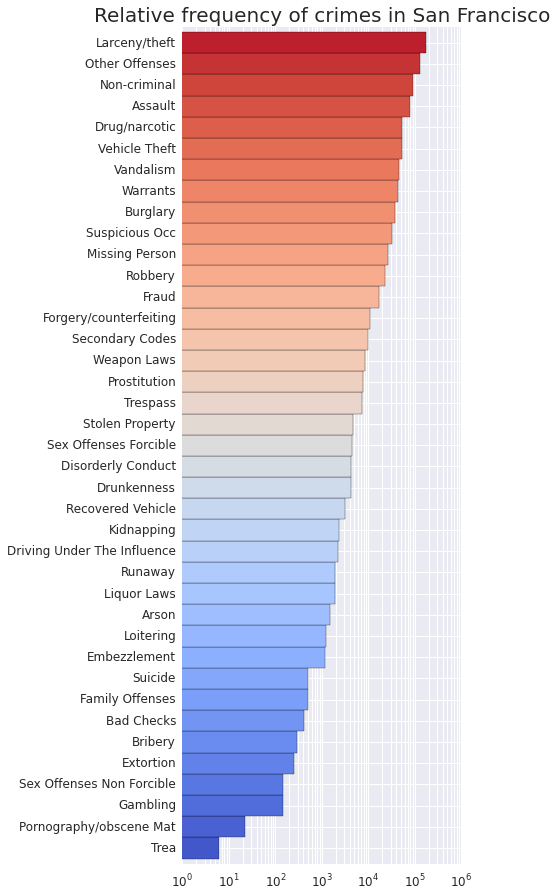

In [8]:
# what are the most recored crimes?

column='Category'
by_col = train.groupby(column)
cf = by_col.size()
cf.index = cf.index.map(string.capwords)
cf.sort(ascending=True, inplace=True)
Ntot=sum(cf)
#cf/=Ntot

figure(figsize=(5,15),dpi=500)
cf.plot(kind='barh',
        #title='Relative frequency of crimes',
        fontsize=12,
        stacked=False,
        width=1,
        color=sns.color_palette('coolwarm', Ncat)
        )
title('Relative frequency of crimes in San Francisco', size=20)
#grid()
xscale('log',nonposx='clip')
#plt.axvline(x=0.05, ymin=0.0, ymax = 1, linewidth=2, color='k')
#plt.text(0.055,1,'>5%',rotation=90,size=12)
#plt.axvline(x=0.01, ymin=0.0, ymax = 1, linewidth=2, color='k')
#plt.text(0.011,1,'>1%',rotation=90,size=12)

savefig('allcrimes.png')



In [5]:
# contribution from the top 6 crimes:
topsum=0
for i in ("LARCENY/THEFT","ASSAULT","OTHER OFFENSES","DRUG/NARCOTIC","VEHICLE THEFT","NON-CRIMINAL"):
    tt=train[train.Category==i]
    topsum=topsum+len(tt)
print "The top 6 crimes make up "+str(100*topsum/float(Ntot))+"% of all crimes."

topsum=0
for i in ("LARCENY/THEFT","ASSAULT","OTHER OFFENSES","DRUG/NARCOTIC","VEHICLE THEFT","NON-CRIMINAL",
         "VANDALISM","WARRANTS","BURGLARY","SUSPICIOUS OCC","MISSING PERSON","ROBBERY","FRAUD","FORGERY/COUNTERFEITING","SECONDARY CODES"):
    tt=train[train.Category==i]
    topsum=topsum+len(tt)
print "The top 15 crimes make up "+str(100*topsum/float(Ntot))+"% of all crimes."

top=("LARCENY/THEFT","OTHER OFFENSES","NON-CRIMINAL","ASSAULT","DRUG/NARCOTIC","VEHICLE THEFT",
         "VANDALISM","WARRANTS","BURGLARY","SUSPICIOUS OCC","MISSING PERSON","ROBBERY","FRAUD","FORGERY/COUNTERFEITING","SECONDARY CODES")

The top 6 crimes make up 65.8293557649% of all crimes.
The top 15 crimes make up 93.3187100037% of all crimes.


/Library/Python/2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


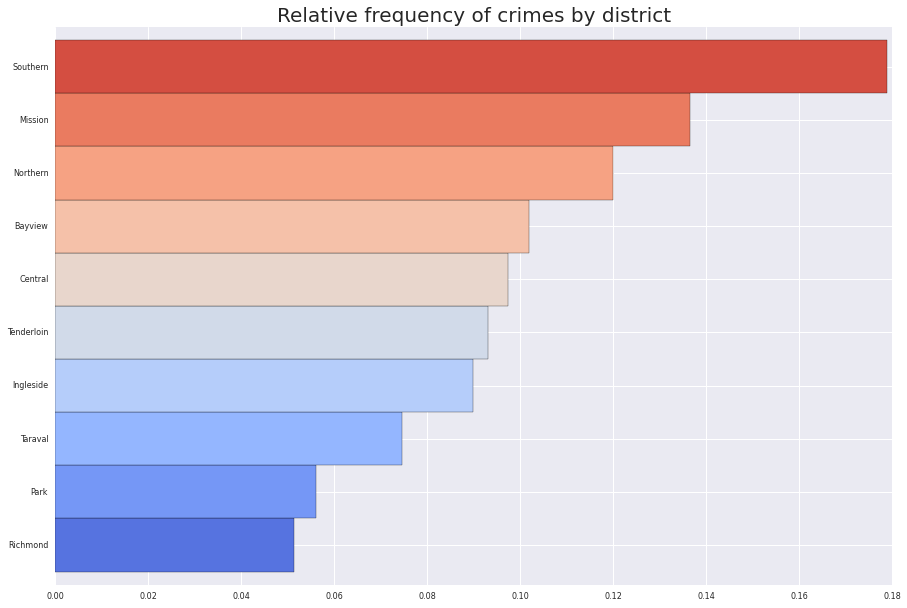

In [84]:
# where are the most crimes reported?
# 18% of crimes in Southern, 5% of crimes in Richmond

column='PdDistrict'
by_col = train.groupby(column)
cf = by_col.size()
cf.index = cf.index.map(string.capwords)
cf.sort(ascending=True, inplace=True)
Ntot=sum(cf)
cf/=Ntot

cf.plot(kind='barh',
        fontsize=8,
        figsize=(15,10),
        stacked=False,
        width=1,
        color=sns.color_palette('coolwarm', Ndist)
        )
title('Relative frequency of crimes by district',size=20)
#xscale('log',nonposx='clip')
#grid()

topdist=('SOUTHERN','MISSION','NORTHERN','BAYVIEW','CENTRAL','TENDERLOIN','INGLESIDE','TARAVAL','PARK','RICHMOND')

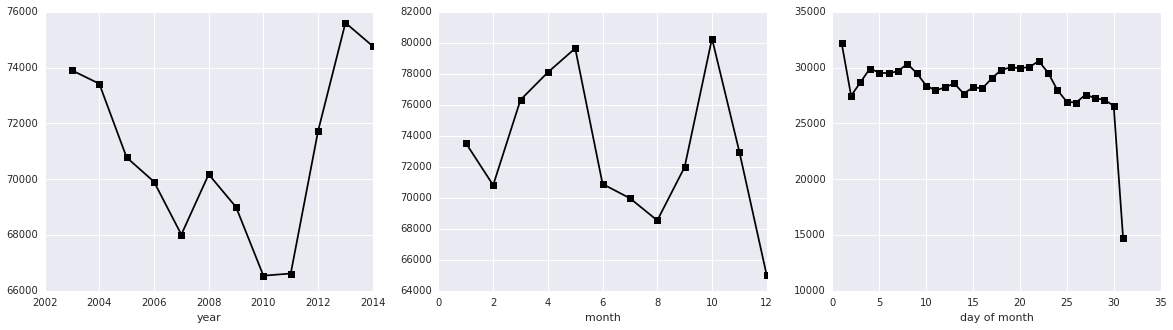

In [8]:
# number of crimes by year
# skip 2015 because lack of data

column='year'
by_col = train.groupby(column)
cf = by_col.size()
figure(figsize=(20,5))
subplot(1,3,1)
plot(cf.index[:Nyears-1],cf[:Nyears-1], 'ks-')
xlabel('year')

# number of crimes by month
# most crimes in May and October; December more safe?

column='month'
by_col = train.groupby(column)
cf = by_col.size()
subplot(1,3,2)
plot(cf.index,cf, 'ks-')
xlabel('month')

column='day'
by_col = train.groupby(column)
cf = by_col.size()
subplot(1,3,3)
plot(cf.index,cf, 'ks-')
xlabel('day of month')

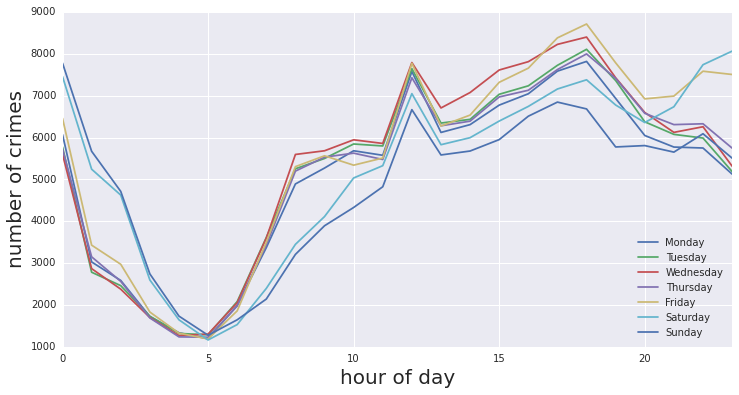

In [25]:
# plot the number of crimes vs time of day
# at the weekend more crimes in late night

figure(figsize=(12,6))
train['event']=1
for i in range(0,7):
    tt=train[train.DOW==i]
    hourly_events = tt[['hour','event']].groupby(['hour']).count().reset_index()
    plot(hourly_events.hour,hourly_events.event,label=wod[i])
    
legend(loc=4)
xlim(0,23);
ylabel("number of crimes",size=20)
xlabel("hour of day",size=20)

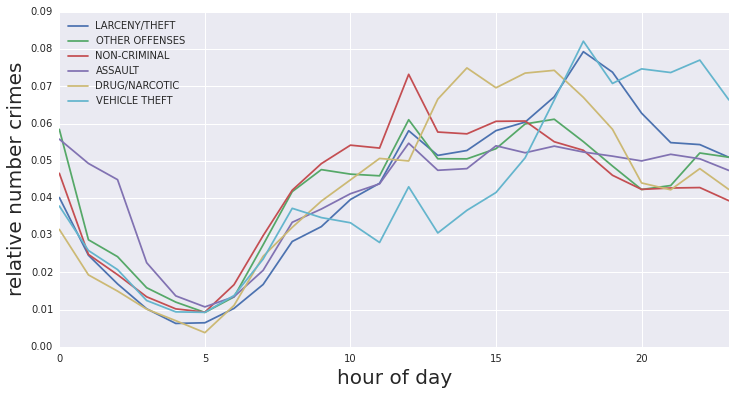

In [123]:
# hourly crimes for the top crimes individually

top=("LARCENY/THEFT","OTHER OFFENSES","NON-CRIMINAL","ASSAULT","DRUG/NARCOTIC","VEHICLE THEFT",
         "VANDALISM","WARRANTS","BURGLARY","SUSPICIOUS OCC","MISSING PERSON","ROBBERY","FRAUD","FORGERY/COUNTERFEITING","SECONDARY CODES")

figure(figsize=(12,6))
for i in top[0:6]:
    train['event']=1
    tt=train[train.Category==i]
    hourly_events = tt[['hour','event']].groupby(['hour']).count().reset_index()
    hourly_events.event = hourly_events.event/hourly_events.event.sum()
    plot(hourly_events.hour,hourly_events.event,label=i)
  

legend(loc=2)
xlim(0,23);
ylabel("relative number crimes",size=20)
xlabel("hour of day",size=20)
savefig('crimes_vs_hour.png',bbox_inches='tight')

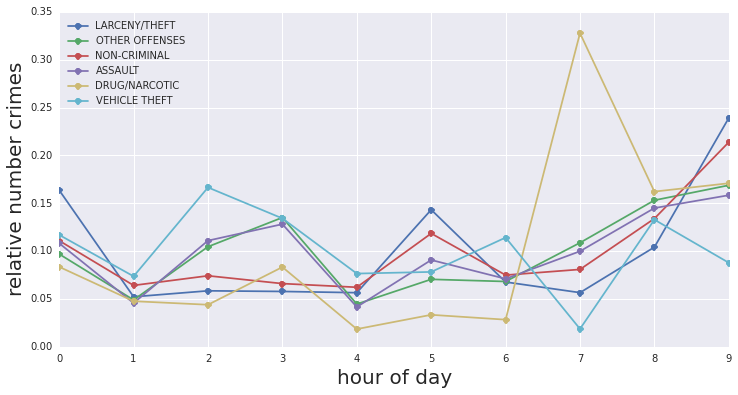

In [122]:
# hourly crimes for the top crimes individually

top=("LARCENY/THEFT","OTHER OFFENSES","NON-CRIMINAL","ASSAULT","DRUG/NARCOTIC","VEHICLE THEFT",
         "VANDALISM","WARRANTS","BURGLARY","SUSPICIOUS OCC","MISSING PERSON","ROBBERY","FRAUD","FORGERY/COUNTERFEITING","SECONDARY CODES")

colors=('r','b','g','c','y','m')

figure(figsize=(12,6))
for ii in range(0,6):
    i=top[ii]
    train['event']=1
    tt=train[train.Category==i]
    dist_events = tt[['distnum','event']].groupby(['distnum']).count().reset_index()
    dist_events.event = dist_events.event/dist_events.event.sum()
    plot(dist_events.distnum,dist_events.event,'o-',label=i)
    #dist_events.event.plot(kind='barh',stacked=True,color=colors[ii])
    
  

legend(loc=2)
#xlim(0,23);



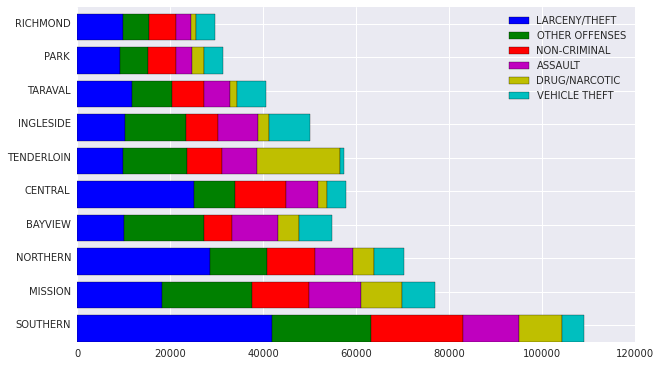

In [125]:
top=("LARCENY/THEFT","OTHER OFFENSES","NON-CRIMINAL","ASSAULT","DRUG/NARCOTIC","VEHICLE THEFT",
     "VANDALISM","WARRANTS","BURGLARY","SUSPICIOUS OCC","MISSING PERSON","ROBBERY","FRAUD","FORGERY/COUNTERFEITING","SECONDARY CODES")

colors=('b','g','r','m','y','c')

figure(figsize=(10,6))
ax=subplot()

Ndist = 10
Ncrim = 6
ind = np.arange(Ndist)
arr = np.zeros(Ndist)

bottom=0
for j in range(0,Ncrim):
    for i in range(0,Ndist):
        arr[i]=len(train[((train.PdDistrict==topdist[i]) & (train.Category==top[j]))])

    plt.barh(ind,arr,color=colors[j],left=bottom,label=top[j])
    bottom=bottom+arr

legend(loc=1)
yticks(np.arange(0.5,10,1))
ax.set_yticklabels(topdist)
savefig('distcrimes.png',bbox_inches='tight')

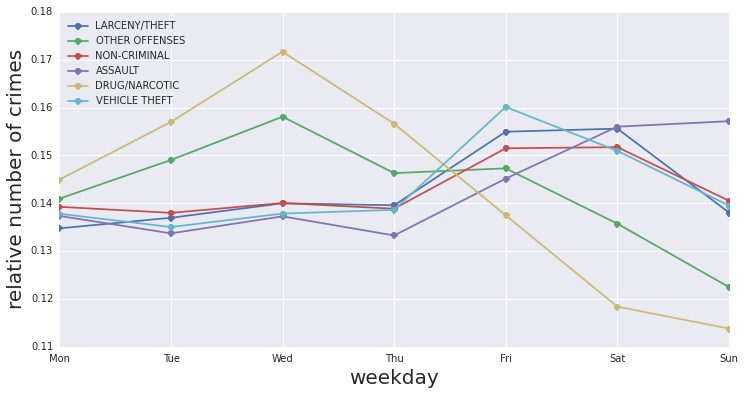

In [120]:


top=("LARCENY/THEFT","OTHER OFFENSES","NON-CRIMINAL","ASSAULT","DRUG/NARCOTIC","VEHICLE THEFT",
     "VANDALISM","WARRANTS","BURGLARY","SUSPICIOUS OCC","MISSING PERSON","ROBBERY","FRAUD","FORGERY/COUNTERFEITING","SECONDARY CODES")

figure(figsize=(12,6))
ax=subplot()
for i in top[0:6]:
    train['event']=1
    tt=train[train.Category==i]
    dist_events = tt[['DOW','event']].groupby(['DOW']).count().reset_index()
    dist_events.event = dist_events.event/dist_events.event.sum()
    plot(dist_events.DOW,dist_events.event,'o-',label=i)
  

legend(loc=2)
#xlim(0,23);
ylabel("relative number of crimes",size=20)
xlabel("weekday",size=20)
ax.set_xticklabels(('Mon','Tue','Wed','Thu','Fri','Sat','Sun'))

savefig('crimes_vs_weekday.png',bbox_inches='tight')